In [1]:
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)

from pyomo.network import Arc, SequentialDecomposition

from idaes.core.util.initialization import propagate_state

# Import plotting functions
import matplotlib.pyplot as plt

# Import numpy library 
import numpy as np

import pandas as pd

# Import the main FlowsheetBlock from IDAES. The flowsheet block will contain the unit model
from idaes.core import FlowsheetBlock

import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus

# Import the degrees_of_freedom function from the idaes.core.util.model_statistics package
# DOF = Number of Model Variables - Number of Model Constraints
from idaes.core.util.model_statistics import degrees_of_freedom

# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)

# Import unit models from the model library
from idaes.generic_models.unit_models import Flash

In [3]:
from R125_bmimPF6_PR import configuration
data = pd.read_csv('R125IL.csv')

solver = SolverFactory('ipopt')
solver.options = {'tol': 1e-6}

In [15]:
m = ConcreteModel()

m.fs = FlowsheetBlock(default={"dynamic": False})

m.fs.properties = GenericParameterBlock(default=configuration)

m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m.fs.F101.inlet.flow_mol.fix(1)
m.fs.F101.inlet.temperature.fix(323.15)
m.fs.F101.inlet.pressure.fix(399800)
m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(0.5)


m.fs.properties.PR_kappa_A['bmimPF6', 'R125'].fix(-0.13412969850397466)
m.fs.properties.PR_kappa_A['R125', 'bmimPF6'].fix(-0.01210099548150484)
m.fs.properties.PR_kappa_A['bmimPF6', 'R125'].fix(0.0)
m.fs.properties.PR_kappa_A['R125', 'bmimPF6'].fix(0.0)

# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# Fix the state variables on the state block
# m.fs.F101.inlet.pressure.unfix()
m.fs.F101.inlet.mole_frac_comp[0,'bmimPF6'].unfix()

R125_x = np.zeros((len(data)))
P = np.zeros((len(data)))

m.fs.liq = Param(mutable=True,default=0.040)
m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "bmimPF6"] == m.fs.liq)

for i in range(len(data)):
    m.fs.liq = data["x_bmimPF6"].iloc[i]
    m.fs.F101.inlet.temperature.fix(float(data["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(float(data["x_R125"].iloc[i])+0.1)
    m.fs.F101.inlet.mole_frac_comp[0,'bmimPF6'].fix(float(1-(data["x_R125"].iloc[i]+0.1)))
    m.fs.F101.vap_outlet.temperature.fix(float(data["temperature"].iloc[i]))
    
    print("x =", data["x_bmimPF6"].iloc[i])
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    status = solver.solve(m, tee = False)

#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):

        R125_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R125']) 
        P[i] = value(m.fs.F101.vap_outlet.pressure[0])

    else:
        print('Infeasible.')

x = 0.987
x = 0.966
x = 0.925
x = 0.874
x = 0.815
x = 0.745
x = 0.658
x = 0.538
x = 0.4
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
Infeasible.
x = 0.997
x = 0.977
x = 0.95
x = 0.92
x = 0.889
x = 0.857
x = 0.82
x = 0.739
x = 0.637
x = 0.987
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
Infeasible.
x = 0.972
x = 0.958
x = 0.943
x = 0.928
x = 0.913
x = 0.88
x = 0.846
x = 0.993
x = 0.984
x = 0.975
x = 0.967
x = 0.957
x = 0.947
x = 0.93
x = 0.912


In [16]:
print(P)
print(data["pressure"])
print(R125_x)
print(data["x_R125"])

[  35343.42017232   92683.4669924   204823.51155854  342132.76822038
  500581.55431427  677088.00941795  886658.61949643 1117103.75247202
       0.           11956.57176782   91980.38034712  200813.46998529
  321947.32861522  449719.77404039  581677.88198701  735088.44227825
 1071904.22536667 1484197.86144335       0.          192088.62088191
  290558.81823534  396326.7057168   505239.62099426  613768.24816297
  860983.26309679 1125730.24716325   73531.61910129  169427.12291863
  266903.48581395  353860.17798044  464622.9868534   577175.78184887
  774176.18952083  986713.5075819 ]
0       9900
1      99600
2     199600
3     299600
4     399600
5     499700
6     599700
7     699600
8     799800
9       9800
10     99600
11    199800
12    299500
13    399800
14    499500
15    599500
16    799600
17    999800
18     99600
19    199800
20    300000
21    399700
22    499900
23    599600
24    799700
25    999600
26     99700
27    199600
28    299700
29    399700
30    499800
31    599

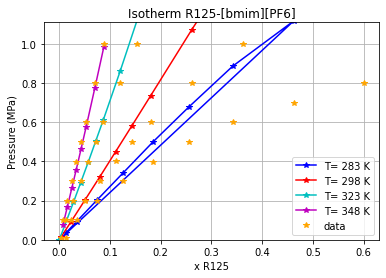

In [17]:
# for i in range(len(P)):
#     P[i] = P[i]*1e6
P1= np.zeros((len(P)))

for i in range(len(P)):
    P1[i] = P[i]/1e6

    
plt.plot(R125_x[0:9],P1[0:9],"b*-",label="T= 283 K")  
plt.plot(R125_x[9:18],P1[9:18],"r*-",label="T= 298 K") 
plt.plot(R125_x[18:26],P1[18:26],"c*-",label="T= 323 K") 
plt.plot(R125_x[26:],P1[26:],"m*-",label="T= 348 K")
plt.plot(data["x_R125"],data["pressure"]/1e6,"*",color='orange',label="data")  
plt.title('Isotherm R125-[bmim][PF6]')
plt.ylabel('Pressure (MPa)')
plt.xlabel('x R125')
plt.grid(True)
plt.ylim(0,1.110000)
plt.legend()
plt.show()

In [18]:
m.fs.F101.report()


Unit : fs.F101                                                             Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key             : Value   : Fixed : Bounds
          Heat Duty :  14.395 : False : (None, None)
    Pressure Change : -12886. : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                              Inlet    Vapor Outlet  Liquid Outlet
    flow_mol                   1.0000      0.10965       0.89035  
    mole_frac_comp bmimPF6    0.81200   1.0000e-08       0.91200  
    mole_frac_comp R125       0.18800       1.0000      0.088000  
    temperature                348.20       348.20        348.20  
    pressure               9.9960e+05   9.8671e+05    9.8671e+05  


In [ ]:
# print(P1)